### Import

In [14]:
from os import listdir as os_listdir
from os import environ as os_environ
from os.path import isfile as os_isfile
from os.path import join as os_path_join
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator


### Folder

In [8]:
image_dir = os_environ['IMAGES_FOLDER']
print(image_dir)
new_images_dir = os_path_join(image_dir, '../images_cropped_from_augmentation')

/Users/svinchon/code/NMenacho/To-infinity-and-beyond/data/images_cropped_sample


### Create X

In [9]:

image_files = []
for f in os_listdir(image_dir):
    if os_isfile(os_path_join(image_dir, f)):
        if f.endswith(".jpg"):
            image_files.append(f)
        else:
            print("not jpg ignored")

X_list = []
y_list = []

for image_file in image_files:
    image_info = image_file.replace('.jpg', '').split("_")
    if len(image_info) > 4:
        cat = image_info[3]
        image_data = np.array(Image.open(os_path_join(image_dir,image_file)))
        X_list.append(image_data)
        y_list.append(cat)
    # else:
    #     os.remove(os.path.join(image_dir,image_file))

X_data = np.array(X_list)
print(X_data.shape)
y_data = np.array(y_list)
print(y_data.shape)

(3120, 128, 128, 3)
(3120,)


### Augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

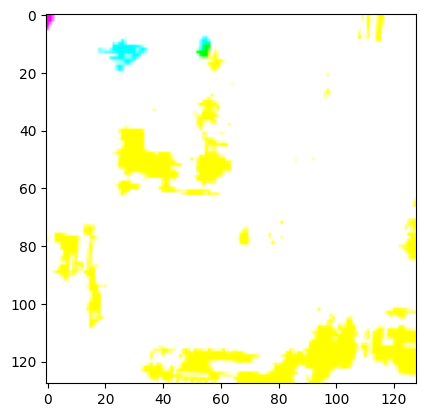

In [16]:
img_data_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2,
    #featurewise_center = False,
    #featurewise_std_normalization = False,
)

img_data_gen.fit(X_data)

X_new_iterator = img_data_gen.flow(
    X_data,
    shuffle=False,
    batch_size=1
)

for index, augmented_image in enumerate(X_new_iterator):
    plt.imshow(augmented_image[0])
    if index > 10:
        break
